**Exploring Dates in the Ritter DataFrame**

In this Notebook we use the DataFrame to look for possible patterns in the distribution of the the *date* entries.

We explode the column 'dates' to have all dates mentioned in the collection, clean it up excluding non-numerals such as 'XVème siècle' or Roman numerals like 'MDI' and converting all the strings to integers. We can then exclude the data which escape a defined range (1450-1650).

We explore the data for some base stats with .describe and with a histogram; 
assess which dates are most frequent (fig1, "dates_incunables_pluscommuns.png");
show the distribution of frequencies on all year in chronological order;
show the same distribution in a cleaner way regrouping the years by five-years periods.

NB: the exploratory range 1450-1650 might need to be redefined according to special expertise in the collection and in the history of incunables.
a consultation with Daniel Bornemann is planned for October 2025

In [112]:
#installing required modules
%pip install matplotlib
# %pip install scipy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#importing required modules
import pandas as pd
import pathlib
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
# import scipy
import seaborn as sns

In [2]:
# tiny helper to convert the normalize path in functions :

def safe_path(raw_path: str) -> str:
    return str(Path(raw_path).expanduser().resolve())

In [3]:
# importing the dataframe
# if we want page as index
# frame = pd.read_csv(r'C:\Users\pbrusa\Documents\EDA_incunables\Ritter_data\Ritter_dataframe.csv').set_index('page')
frame = pd.read_csv(r'C:\Users\pbrusa\Documents\EDA_incunables\Ritter_data\Ritter_dataframe.csv')

# safety check: are the lists lists?
# type(frame['dates'].iloc[0])
# convert strings back into lists, elementwise
import ast
frame = frame[['names','dates','places']].map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# double check: are the lists lists?
type(frame['dates'].iloc[0])

list

In [4]:
# extract only the date column, each entry a row
dates_df = frame.explode('dates', ignore_index = False)
dates_df

,names,dates,places
0,[],AUX,[ALSACE]
0,[],XVe XVIe SIÈCLES,[ALSACE]
0,[],XVe siècle,[ALSACE]
0,[],XVIe s.,[ALSACE]
0,[],XVIe siècle,[ALSACE]
...,...,...,...
2488,"[Wolfgang Köpfel, Jean Schwan, Christian, Thi...",1524,"[Strasbourg, Strasbourg, Strasbourg, Strasbour..."
2488,"[Wolfgang Köpfel, Jean Schwan, Christian, Thi...",1592,"[Strasbourg, Strasbourg, Strasbourg, Strasbour..."
2489,[BONTEMPS],1960,[]
2490,[],NaN,[]


In [5]:
# checking data type
type(dates_df['dates'].iloc[0])

str

In [6]:
# we need only the one column, and it must be without NaN; only if the content is numeric (mask); we let pandas consider it as int
# we can then describe
dates_df['dates'].dropna()[dates_df['dates'].dropna().str.isnumeric()].astype(int).describe()

# we observe some probable errors in the starting data (min 4, max 15571 --> probably 1557). is std also probably influenced by this?

count     7267.000000
mean      1616.074721
std        419.286659
min          4.000000
25%       1519.000000
50%       1552.000000
75%       1636.000000
max      15571.000000
Name: dates, dtype: float64

<Axes: title={'center': 'Dates plus fréquentes'}, xlabel='dates'>

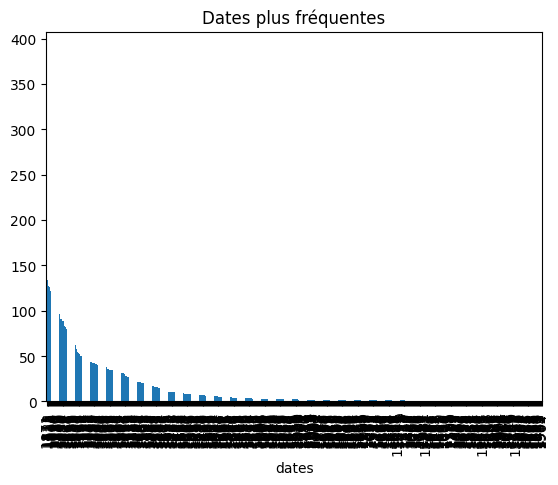

In [7]:
# build a frequency visualization
# clean up the data to numerics, then count the frequency. 
absolute_frequencies = dates_df['dates'].dropna()[dates_df['dates'].dropna().str.isnumeric()].value_counts()
# what kind of object is it?
type(absolute_frequencies)
# visualize as a bar chart
absolute_frequencies.plot(kind='bar', title="Dates plus fréquentes")

In [8]:
# the visualition ist too cluttered: we need a cutoff. where? 
# use describe to find the percentiles
absolute_frequencies.describe([.75, .85, .95])

## we observe a difference between the median (3) and the mean (13)
## a longt tail (75%) of data below the mean
## a significant cutoff could be somewhere in the highest quartile, between 85% and 95%

count    528.000000
mean      13.763258
std       28.591456
min        1.000000
50%        3.000000
75%       10.000000
85%       31.000000
95%       63.650000
max      388.000000
Name: count, dtype: float64

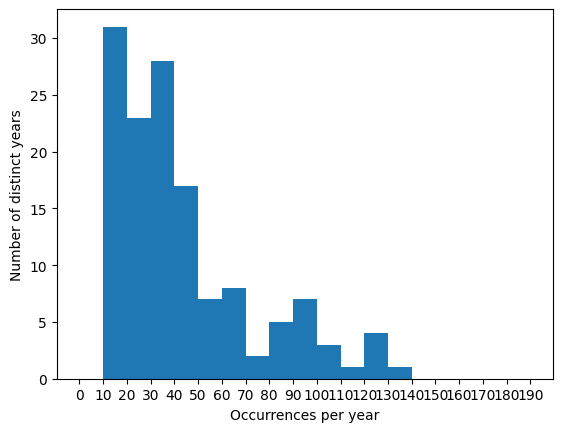

In [9]:
# we try cutting off the 75% now, and to plot the freqeuencies with a histogram
morethan10 = absolute_frequencies[absolute_frequencies >= 10]
ax = morethan10.plot(kind="hist", bins=range(0, 200, 10), )
ax.set_xticks(range(0, 200, 10))
ax.set_xlabel("Occurrences per year")
ax.set_ylabel("Number of distinct years")
plt.show()

## the sharpest elbow in the frequencies is between 40 and 50 occurrences of the same date: only ~50 of 528 mentioned years occur 50 or more times

In [10]:
# we cut at 50 and try the bar chart with the higher occurrencies, cutting out all dates above 1799
# make a Series with only dates which occur 50 or more times
morethan50 = absolute_frequencies[absolute_frequencies >= 50]
# make one with index < 1800
filtered = morethan50[morethan50.index.astype(int) < 1800]
# visualize as a bar chart
#filtered.plot(kind='barh', title="Années mentionnées > 50 fois")

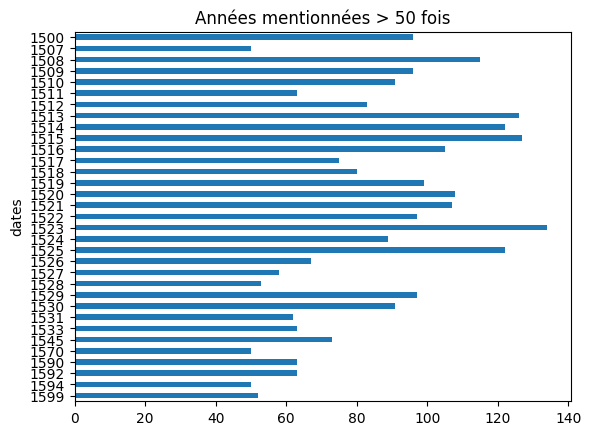

In [11]:
# sort the index in filtered
chronology50 = filtered.sort_index(ascending = False)
mostcommon = chronology50.plot(kind='barh', title="Années mentionnées > 50 fois")


[]

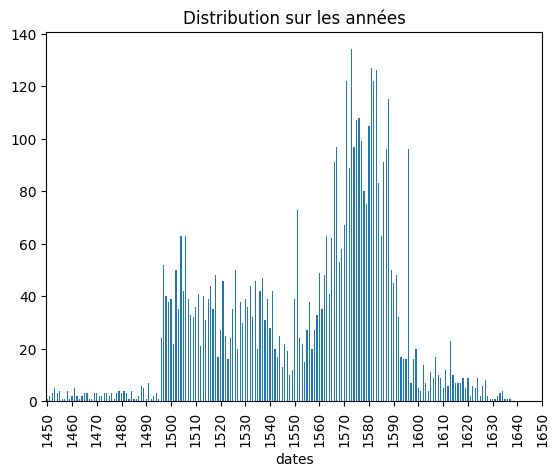

In [12]:
# we can now take all the years in chronological order within a significant range and see the distribution
# define range: 1450 (Gutenberg) - 1650 (to be defined - ask Daniel Bornemann @BNU)
MIN_VALUE = 1450
MAX_VALUE = 1650

# str to integers
alldates = absolute_frequencies.copy()
alldates.index = alldates.index.astype(int)
# sort by year
alldates = alldates.sort_index(ascending = False)
# define range
alldates = alldates[alldates.index > MIN_VALUE]
alldates = alldates[alldates.index < MAX_VALUE]
# define axis x for the plot
ax1 = plt.gca()
# define the intervals
spacing = 10
# define the range for the axis x
l = np.arange(MIN_VALUE, MAX_VALUE+1, spacing)
# define the plot
distribution = alldates.plot(kind = 'bar', title = 'Distribution sur les années')
# define the axis x according to the range l
# since the data don't start with 0, we need them to start at MIN_VALUE
ax1.set(xticks=[x - l[0] for x in l], xticklabels = l)
# visualize
plt.plot()
# we obtain a first impression of the distribution

<Axes: title={'center': 'Distribution par lustre'}, xlabel='dates', ylabel='Citations'>

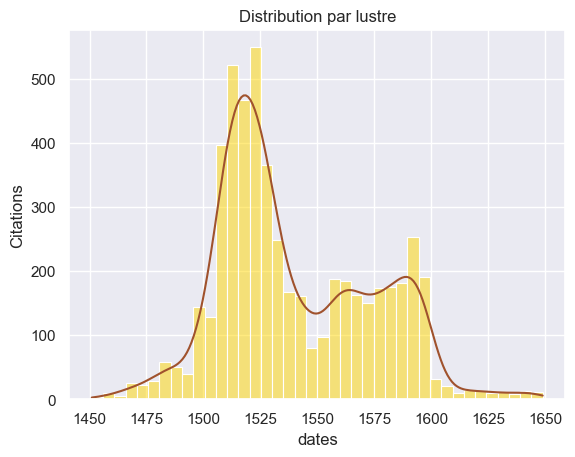

In [13]:
# we can now refine the graph, regrouping them in five-year-periods and describing the curve with a line
sns.set_theme()
# regroup the data by groups of 5 years with seaborn
forhist = dates_df['dates'].dropna()[dates_df['dates'].dropna().str.isnumeric()]
forhist = forhist.to_frame()

# str to integers
forhist['dates'] = forhist['dates'].astype(int)
# define range
forhist = forhist[forhist['dates'] > MIN_VALUE]
forhist = forhist[forhist['dates'] < MAX_VALUE]
# visualize
ligne = sns.histplot(data=forhist, x='dates', binwidth=5, kde = True, color='gold')
ligne.lines[0].set_color('sienna')
ligne.set(title='Distribution par lustre', ylabel='Citations')
ligne

In [14]:
# exporting the graphs

fig1 = mostcommon.get_figure()
fig2 = distribution.get_figure()
fig3 = ligne.get_figure()

fig1.savefig("dates_incunables_pluscommuns.png")
fig2.savefig("dates_incunables.png")
fig3.savefig("dates_incunables_parlustre.png")